# ROC曲線とAUC

## 1. ライブラリの読み込み

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier

# ROC曲線とAUCを算出するための関数
from sklearn.metrics import roc_curve, auc 

# 標準化を行うためのクラス
from sklearn.preprocessing import StandardScaler

## 2. データの読み込み
- データセット：[House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)
    - 20個の説明変数をもつ住宅価格のデータ
    - 今回は以下の7つの変数を使用
- [説明変数の意味](https://www.kaggle.com/code/hnnhytc/data-analysis-with-python)
    - sqft_living:	延床面積 [平方フィート]
    - sqft_lot:	敷地面積 [平方フィート]
    - sqft_above:	地下室を除いた延床面積 [平方フィート]
    - yr_built:	建築年
    - **yr_renovated:	改装された年**
    - sqft_living15:	2015年における延床面積
    - sqft_lot15:	2015年における敷地面積

In [2]:
# CSVファイルの読み込み
df_house = pd.read_csv("../../1_data/ch3/kc_house_data.csv")[
    ['yr_renovated', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']
]
# yr_renovatedを「改装済み」を表すカテゴリ変数に変換
df_house['yr_renovated'] = df_house['yr_renovated'] > 0 

# データの確認(5件/全体21613件)
df_house.head()

,yr_renovated,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
0,False,1180,5650,1180,1955,1340,5650
1,True,2570,7242,2170,1951,1690,7639
2,False,770,10000,770,1933,2720,8062
3,False,1960,5000,1050,1965,1360,5000
4,False,1680,8080,1680,1987,1800,7503


## 3. データの前処理

In [3]:
# 目的変数と説明変数を分割
y = df_house["yr_renovated"].values
X = df_house.drop('yr_renovated', axis=1).values

# 各特徴量を平均0，分散1となるように変換（標準化）するためのクラス
# 今回のデータセットは特徴量の平均や分散がそれぞれで大きく異なるため、
# そのままでは確率値がうまく算出されない
std_scaler = StandardScaler() 

# 標準化した特徴量X_scaledを得る
# 以降はX_scaledをモデルの学習等に使う
X_scaled = std_scaler.fit_transform(X)

## 4. モデルの構築・学習

In [4]:
# ロジスティック回帰モデルの構築
clf = SGDClassifier(loss='log_loss', max_iter=10000, fit_intercept=True, 
                    random_state=1234, tol=1e-3, )

# モデルの学習
clf.fit(X_scaled, y)

SGDClassifier(loss='log_loss', max_iter=10000, random_state=1234)

## 5. モデルの評価

In [5]:
# 入力Xに対する各クラスの確率値を取得
y_pred = clf.predict_proba(X_scaled)

# 各入力に対するクラス確率が [クラス0の確率, クラス1の確率] 
# という順番で配列に格納されている
y_pred[:5]

array([[0.97522111, 0.02477889],
       [0.93902818, 0.06097182],
       [0.95333629, 0.04666371],
       [0.97641698, 0.02358302],
       [0.9906112 , 0.0093888 ]])

In [6]:
# y_pred[:, 1] でクラス1の確率のみを取得
y_score =  y_pred[:, 1]

# ROC曲線の計算
# 偽陽性率（FPR）、真陽性率（TPR）、閾値を計算
# 21613件全てに対応する点の表示には時間がかかるため、1000件に絞る
num_test = 1000
fpr, tpr, thresholds = roc_curve(y[:num_test], y_score[:num_test])

# AUC を計算
auc_value = auc(fpr, tpr)
auc_value

0.878226811465195

89 points


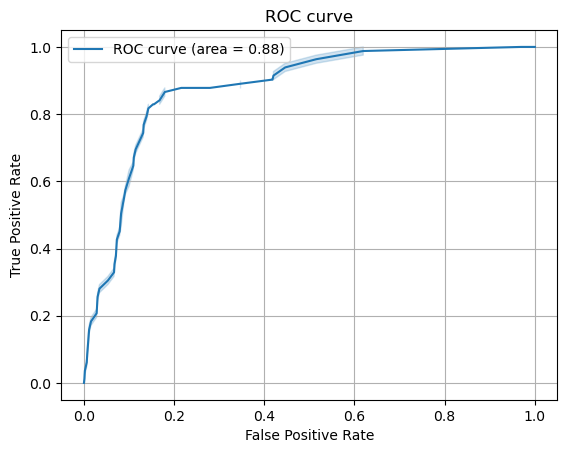

In [7]:
# 閾値の数（ROC 曲線上の点の数）
print(thresholds.shape[0], "points")

# ROC 曲線をプロット
sns.lineplot(x=fpr, y=tpr, label='ROC curve (area = %.2f)'%auc_value)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)